In [13]:
from anndata import read_h5ad
import pandas as pd
import numpy as np
import scvi
import scanpy as sc
import seaborn as sns

# %load_ext nb_black
use_cuda = True
sc.set_figure_params(dpi=200)

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

In [126]:
import sys
sys.path.append('/home/angela/src/scVI_TSP/')
sys.path.append('/home/angela/sapiens/tabula-sapiens/')
# from utils.annotations_utils import *
from utils.colorDict import *
from utils.general_utils import *
from utils.plotting_utils import *

In [3]:
data_path = "/mnt/ibm_lg/angela/sapiens/data/"

In [9]:
adata = read_h5ad(data_path + "Pilot1_Pilot2.decontX.h5ad")
adata

AnnData object with n_obs × n_vars = 150084 × 58870
    obs: 'X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'donor', 'X10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position', 'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation', 'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps', 'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes', 'donor_metho

In [5]:
# adata = read_h5ad(
#     "/mnt/ibm_lg/angela/sapiens/data/Pilot1_Pilot2_filtered_ensembl_id_Aug5.ss2_norm.ann.compartment.allgenes.h5ad")
    

In [6]:
# nodecontX = adata.raw.X

In [7]:
# nodecontX - adata.X

In [8]:
# adata.X[100:110,100:110].todense()

matrix([[2., 0., 0., 2., 0., 1., 0., 2., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 2., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [248]:
# adata.X = adata.raw.X.copy()

In [254]:
# adata.X = adata.layers['raw_counts'].copy()

In [10]:
adata.shape

(150084, 58870)

In [242]:
# %mt<20% - nb cells, %mt<25% - nb cells # case
# 150084-194302, 157116-194302 # decontX + scVI
# 148426-194302, 155241-194302 # decontX before scvi

# 202271-207016, 204624-207016 # before decontX

(-4745, -2392)

In [252]:
adata[adata.obs.pct_counts_mt < 20, :]

/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 150772 × 58870
    obs: '10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'donor', '10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', '10X_sample', 'anatomical_position', '10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated Annotation', 'Entropy All Methods', 'Entropy kNN Reps', 'Entropy scANVI Reps', 'Entropy SVM Reps', 'Potential Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes', 'n_genes

In [228]:
adata

AnnData object with n_obs × n_vars = 194302 × 58870
    obs: 'X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'donor', 'X10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position', 'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation', 'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps', 'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes', 'donor_metho

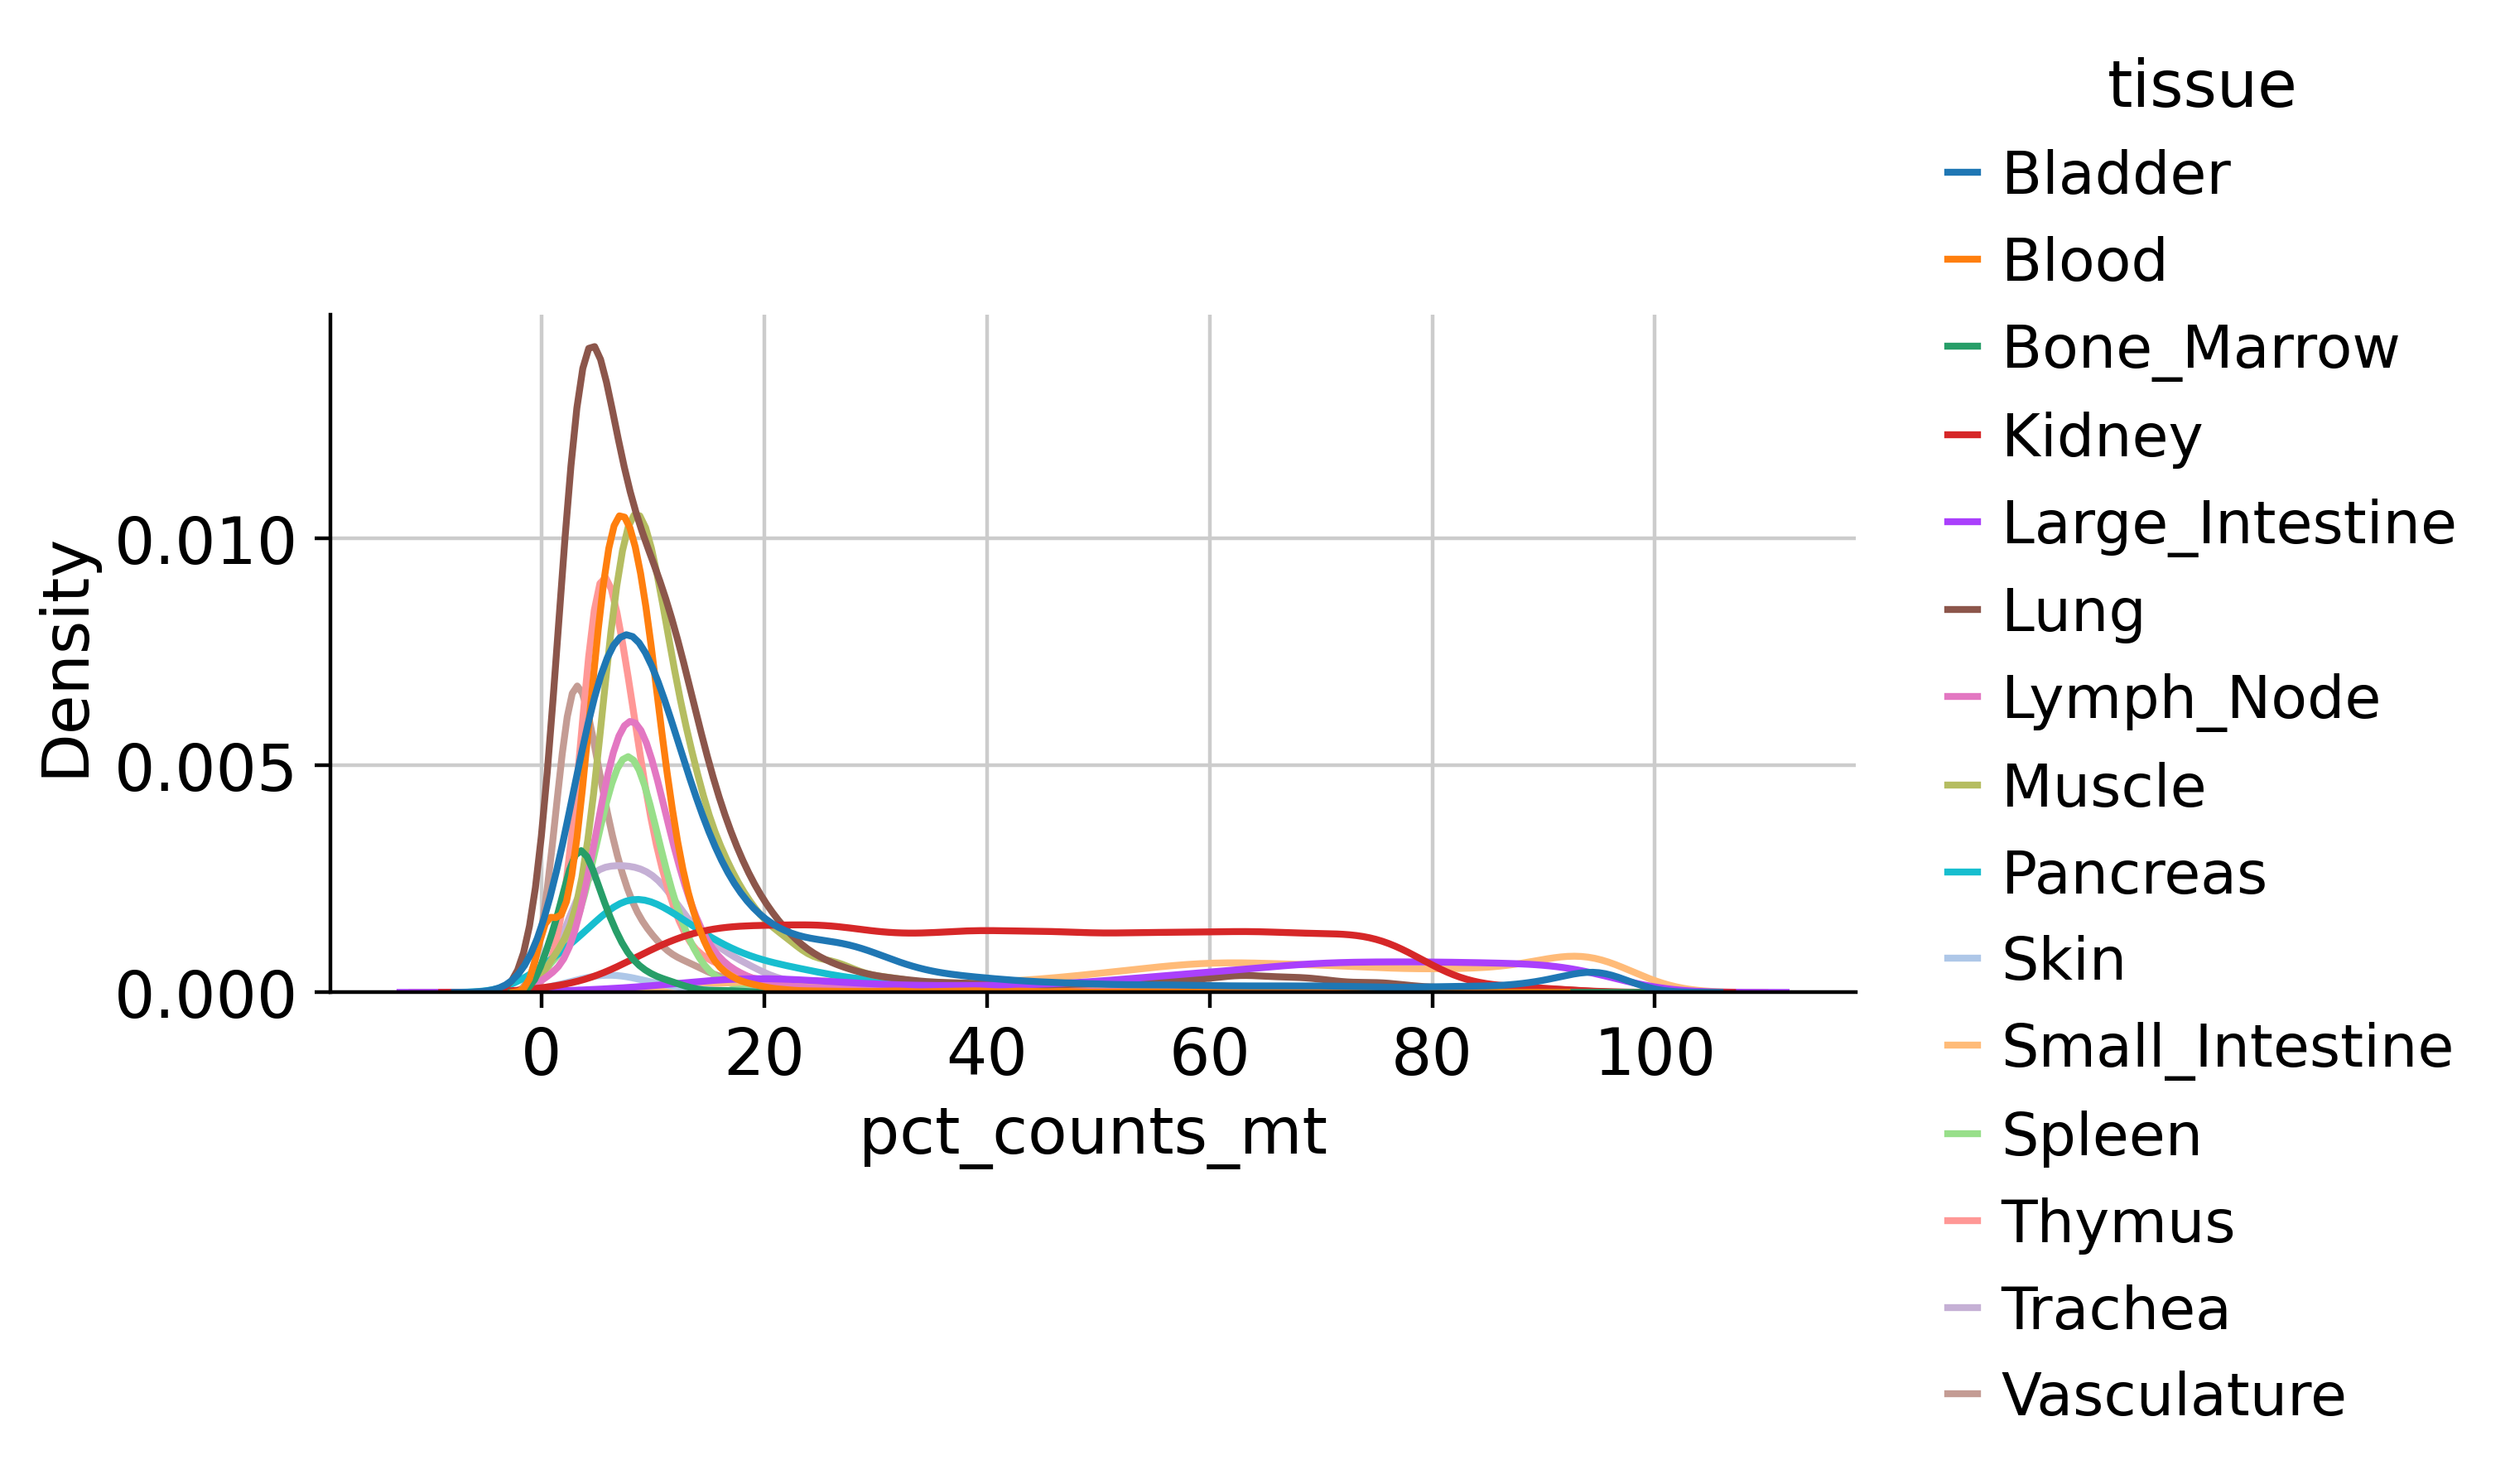

In [255]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
# adata = adata[adata.obs.pct_counts_mt < 20, :]
sns.displot(data=adata.obs, x="pct_counts_mt", kind="kde", height=3, aspect=2, hue="tissue")


In [11]:
adata.obs.groupby(['tissue'])['cell_id'].count()

tissue
Bladder            19601
Blood              16192
Bone_Marrow         3588
Kidney              3549
Large_Intestine     1428
Lung               32704
Lymph_Node          9877
Muscle             19646
Pancreas            5751
Skin                 739
Small_Intestine     1334
Spleen              7963
Thymus             12582
Trachea             6334
Vasculature         8796
Name: cell_id, dtype: int64

/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Trying to set attribute `.var` of view, copying.
/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/angela/.local/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11004. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype

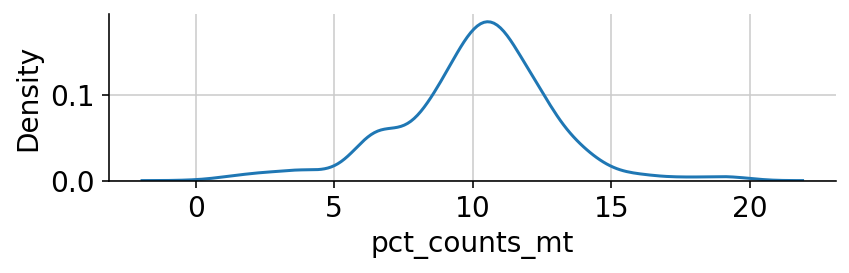

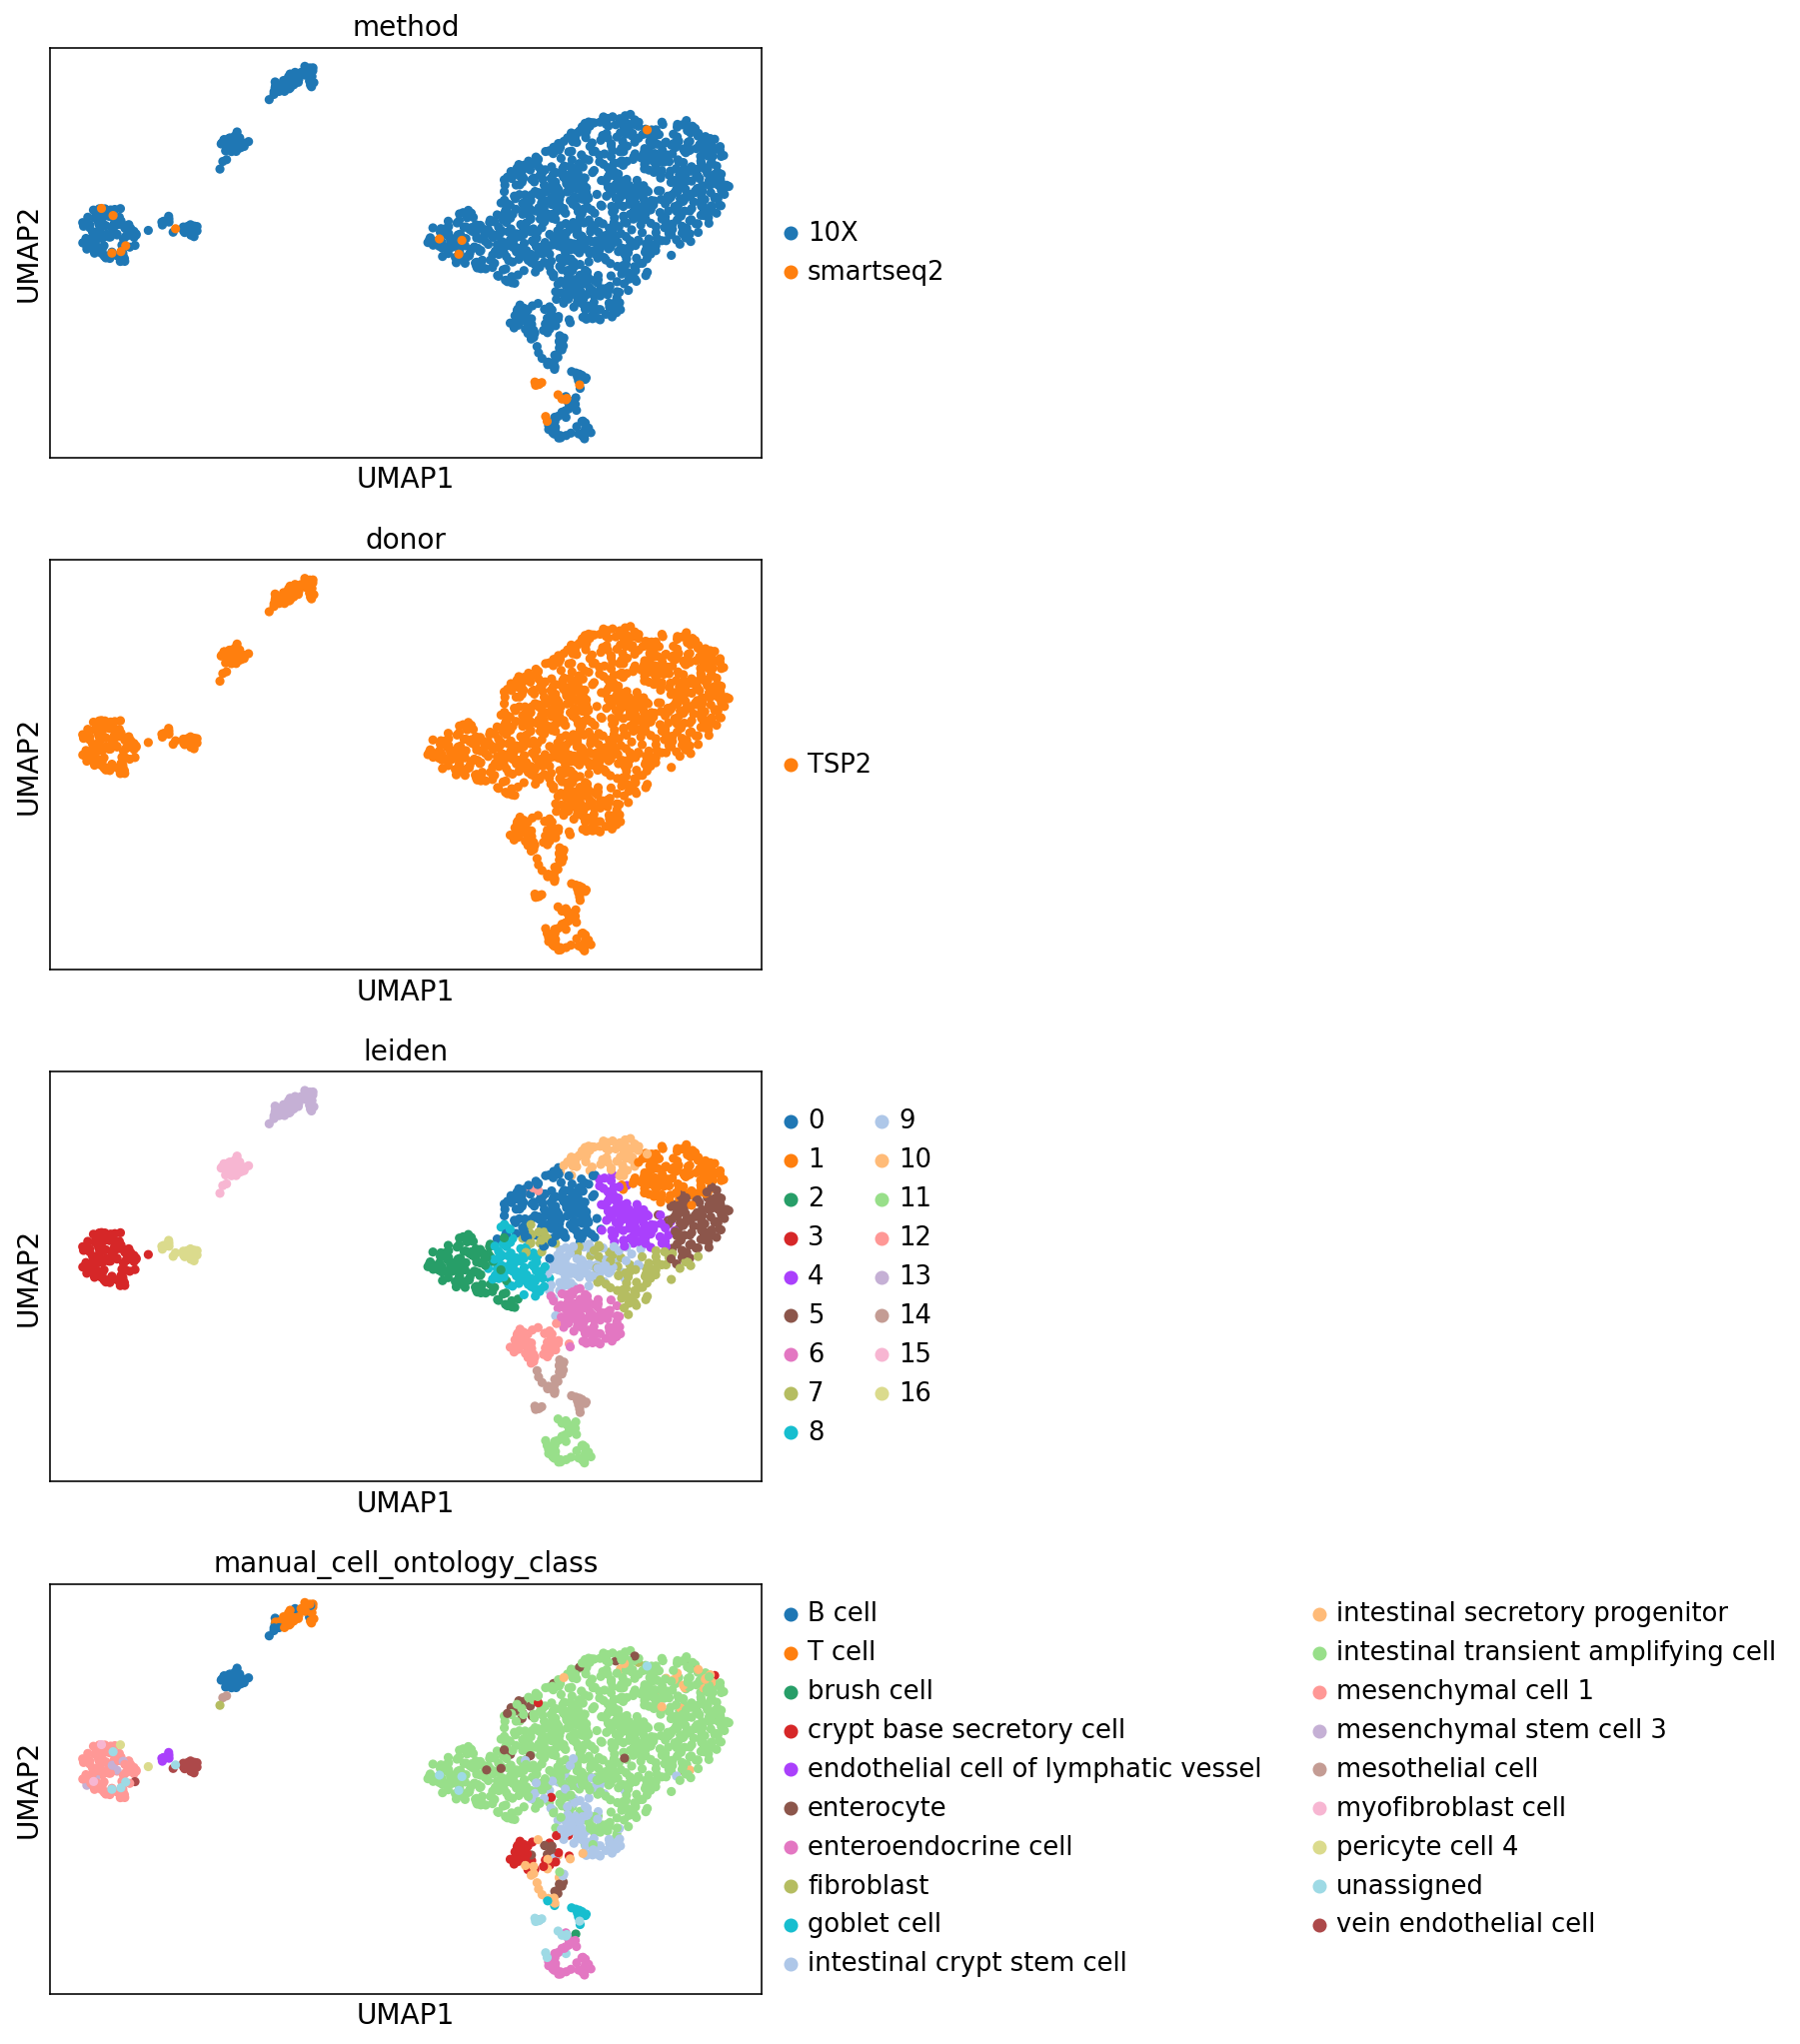

In [15]:
organ = "Large_Intestine"
organ_adata = adata[adata.obs["tissue"] == organ]

organ_adata.var['mt'] = organ_adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(organ_adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sns.displot(data=organ_adata.obs, x="pct_counts_mt", kind="kde", height=2, aspect=3)

organ_adata = organ_adata[organ_adata.obs.pct_counts_mt < 20, :]

sc.pp.neighbors(organ_adata, use_rep="X_scvi_decontX", n_neighbors=15)
sc.tl.umap(organ_adata)
organ_adata.obsm["X_umap_decontX"] = organ_adata.obsm["X_umap"].copy()
sc.tl.leiden(organ_adata, resolution=1)
sc.pl.umap(
    organ_adata,
    color=["method", "donor", "leiden", "manual_cell_ontology_class"],
    ncols=1,
)
organ_adata.X = np.log1p(organ_adata.X)

# cluster to celltype correspondance
count is a matrix of cluster-cell type correspondance, where each row is a celltype, and each colum is a cluster. The entries to the matrix is the number of cells that is annotated as celltype *X* and cluster *Y*

In [16]:
organ_adata

AnnData object with n_obs × n_vars = 1428 × 58870
    obs: 'X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'donor', 'X10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position', 'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation', 'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps', 'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes', 'donor_method'

In [17]:
count = {}
for c in np.unique(organ_adata.obs["leiden"]):
    count[c] = {}
    for t in np.unique(organ_adata.obs["manual_cell_ontology_class"]):
        count[c][t] = np.sum(
            (organ_adata.obs["leiden"].astype(str) == c)
            & (organ_adata.obs["manual_cell_ontology_class"] == t)
        )

count = pd.DataFrame.from_dict(count)

We can visualize the cluster assignment of each cell type through this heatmap. The color is normalized for each celltype 

<AxesSubplot:>

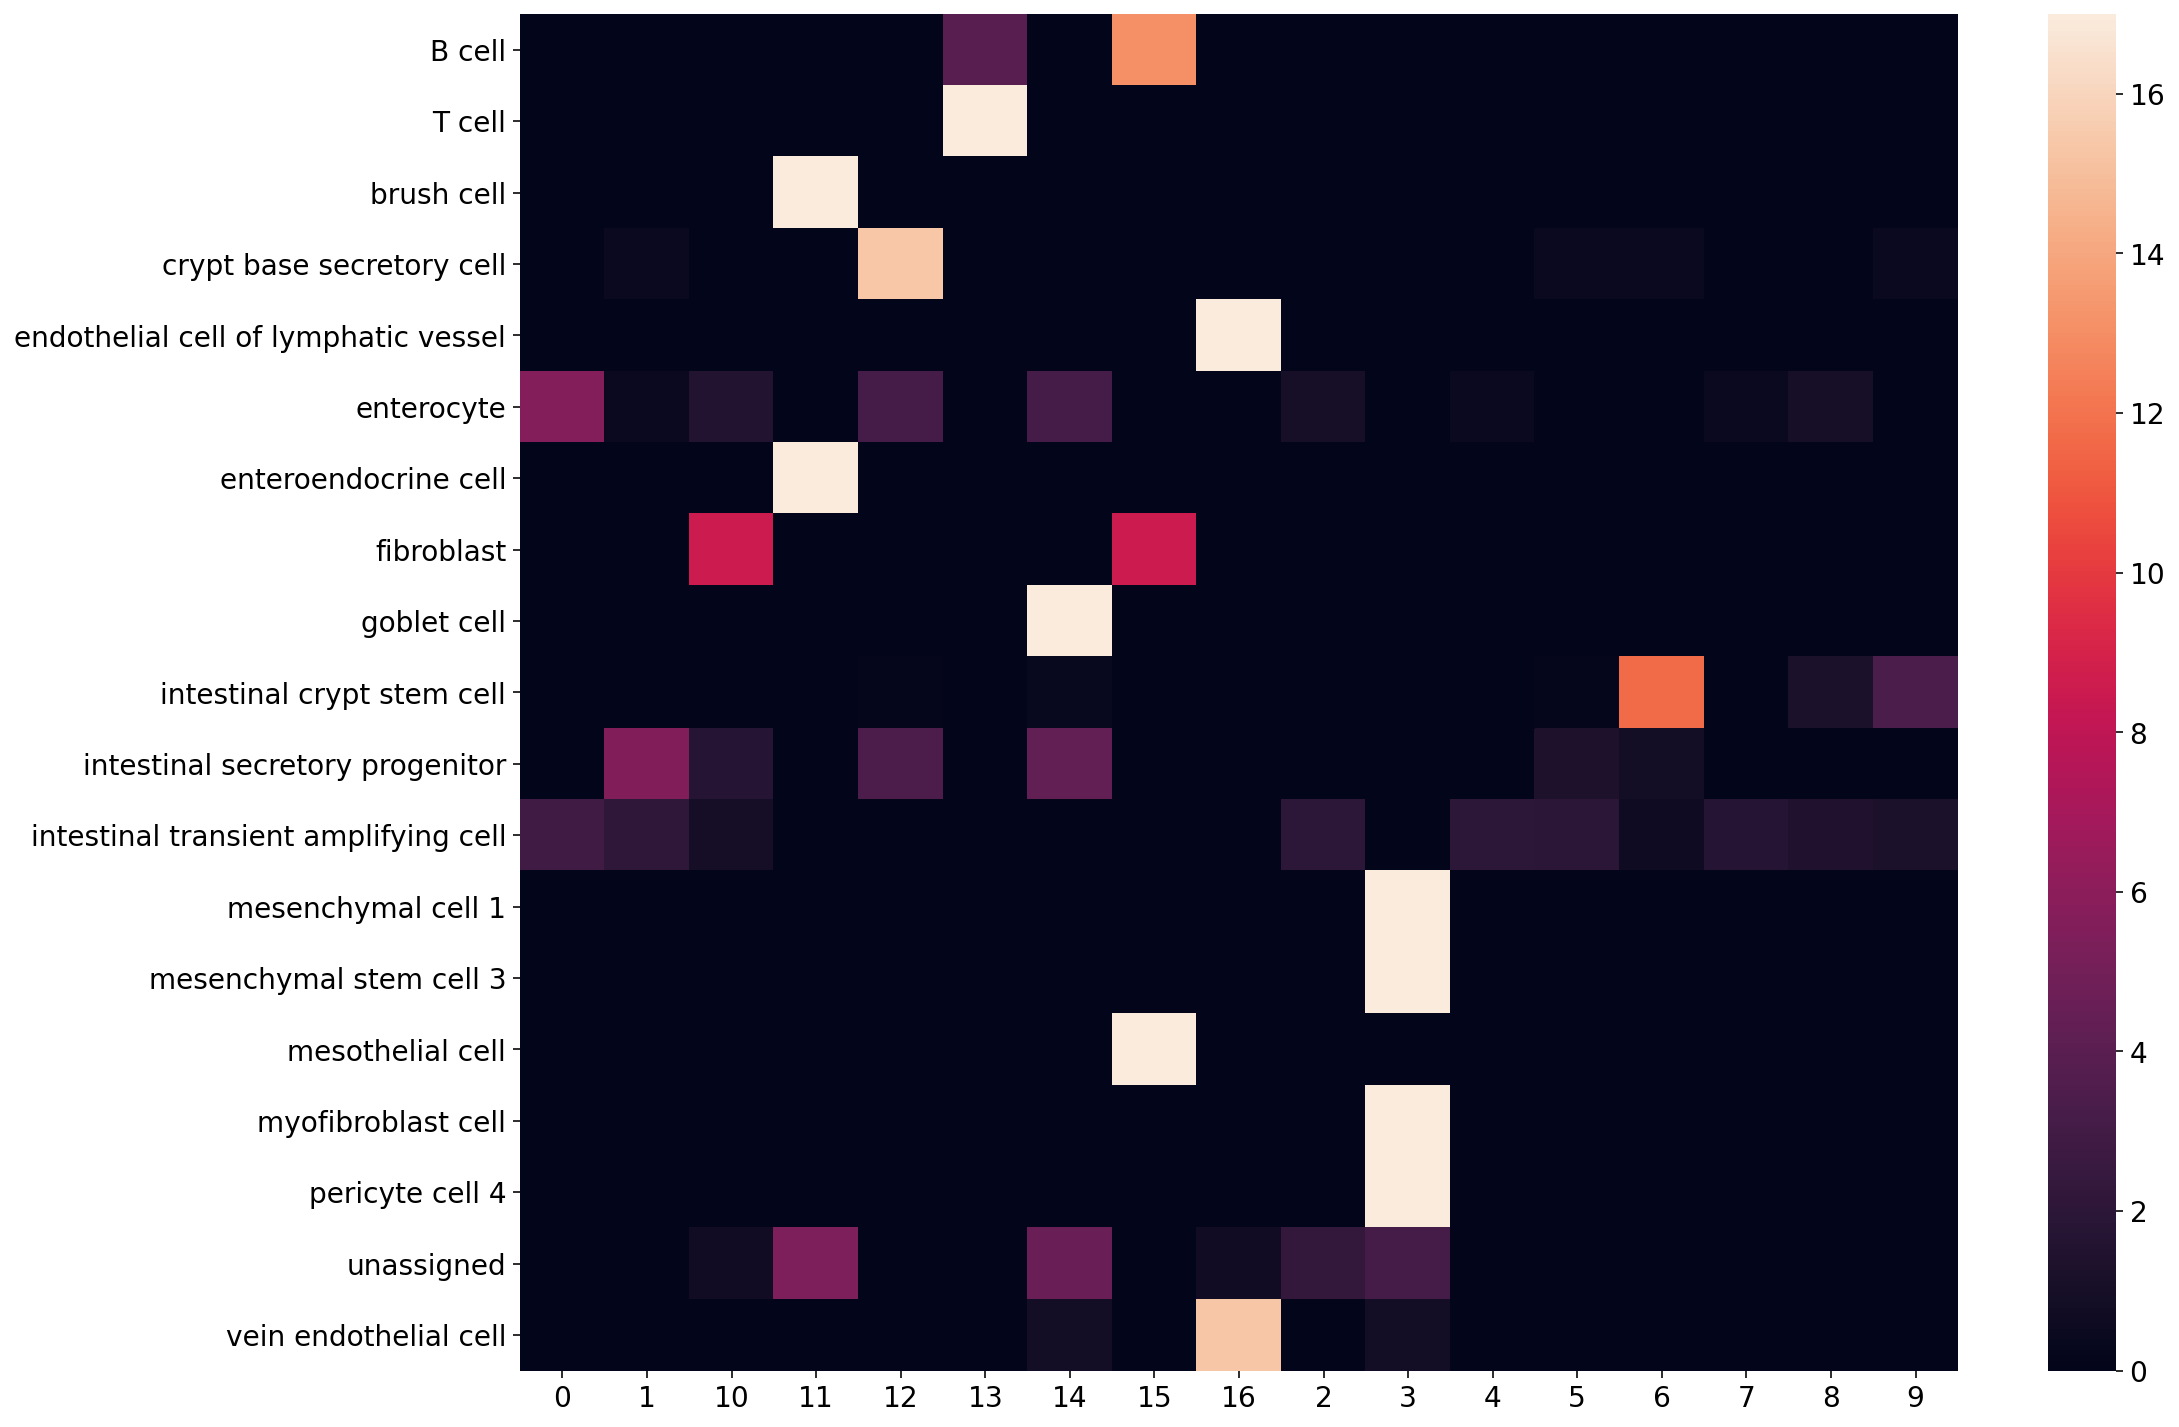

In [18]:
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap((count.T / count.mean(axis=1)).T)

# dictionary of cell type composition of each cluster 
What are clusters previously annotated as 

In [19]:
cluster_composition = {}
for x in count.columns.values:
    t = count.index[count[x] > 0].values
    freq = np.asarray([count.loc[y, x] for y in t]) / count[x].sum()
    res = [a + ": %.2f" % b for a, b in zip(t, freq)]
    cluster_composition[x] = res

In [93]:
cluster_composition["8"]

['enterocyte: 0.02',
 'intestinal crypt stem cell: 0.08',
 'intestinal transient amplifying cell: 0.90']

# Reassign pure clusters
If a cluster is very pure (>95% of annotated cells come from the same celltype, we reassign the clusters to all have the same labels) 

In [21]:
def Purity(x):
    names = x.index
    x = np.asarray(x).ravel()
    x = x[names != "unassigned"]
    return (np.max(x) / np.sum(x), names[np.argmax(x)])

In [22]:
cluster_purity = count.apply(Purity, axis=0).T
confident_clusters = cluster_purity[cluster_purity[0] > 0.95].index

In [23]:
for i in confident_clusters:
    organ_adata.obs.loc[
        organ_adata.obs["leiden"] == i, "new_manual_cell_ontology_class"
    ] = cluster_purity.loc[i, 1]

/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'new_manual_cell_ontology_class' as categorical


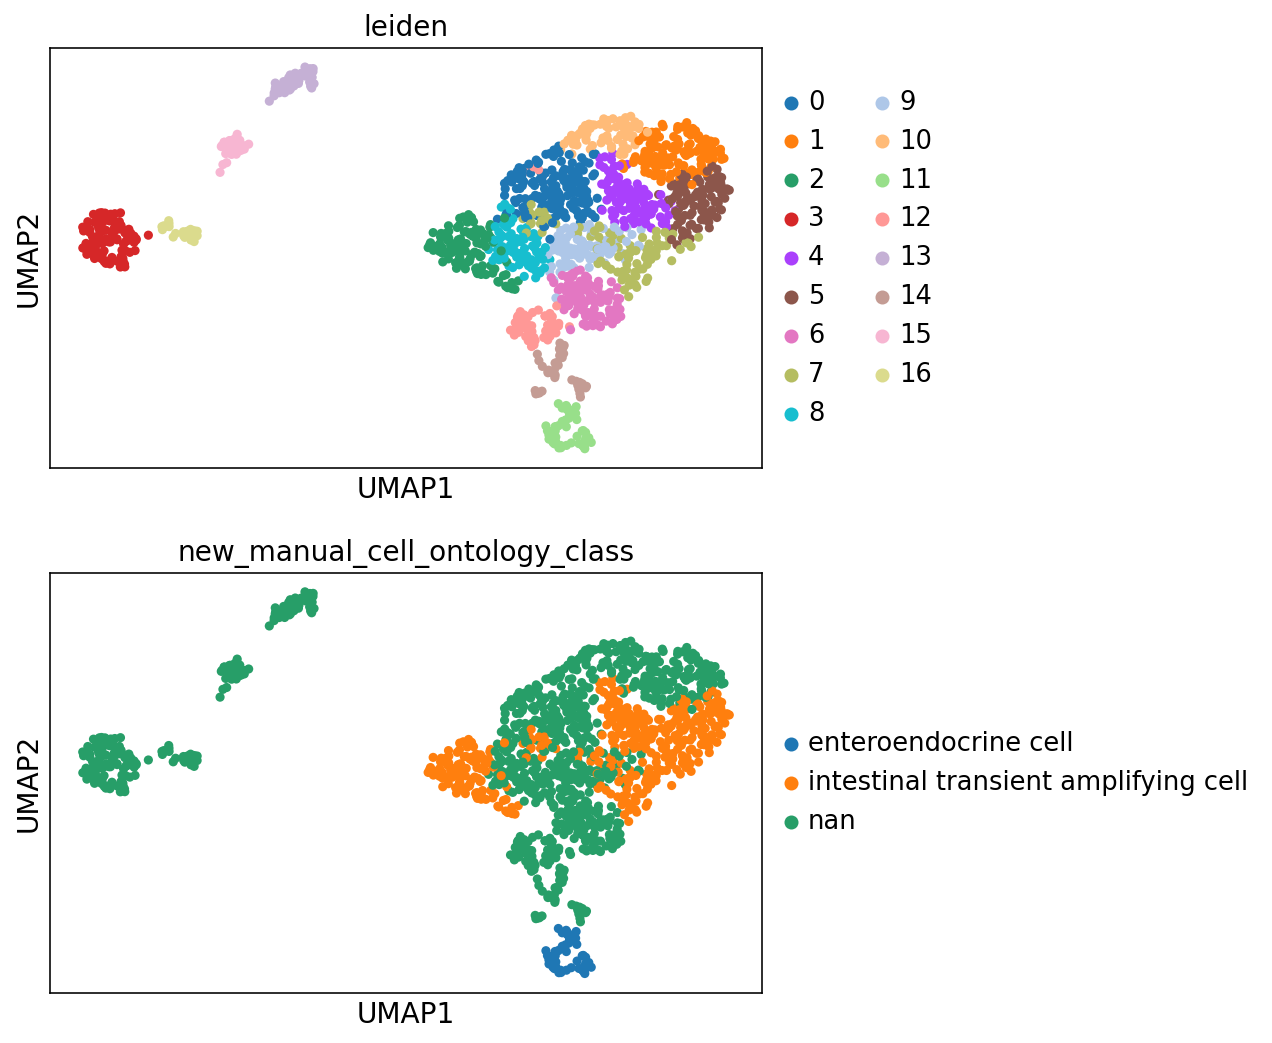

In [24]:
sc.pl.umap(
    organ_adata,
    color=["leiden", "new_manual_cell_ontology_class"],
    ncols=1,
)

In [25]:
set(organ_adata.obs['Propagated.Annotation']),set(organ_adata.obs['manual_annotation'])

({'B cell',
  'CD8-positive, alpha-beta T cell',
  'T cell',
  'brush cell',
  'crypt base secretory cell',
  'endothelial cell of lymphatic vessel',
  'enteroendocrine cell',
  'fibroblast',
  'goblet cell',
  'intestinal crypt stem cell',
  'intestinal transient amplifying cell',
  'mesenchymal cell 1',
  'mesothelial cell',
  'vein endothelial cell'},
 {'B cell',
  'T cell',
  'absorptive progenitor',
  'crypt base secretory cell',
  'enterocyte',
  'enteroendocrine cell',
  'fibroblast',
  'goblet cell',
  'intestinal crypt stem cell',
  'lymphatics endothelial cell',
  'mesenchymal cell 1',
  'mesenchymal stem cell 3',
  'mesothelial cell',
  'myofibroblast cell',
  'pericyte cell 4',
  'secretory progenitor',
  'transient amplifying cell',
  'tuft cell',
  'unassigned',
  'vein endothelial cell'})

In [26]:
organ_adata.obs.groupby(['leiden']).agg({'new_manual_cell_ontology_class':set,'Propagated.Annotation':set})

,new_manual_cell_ontology_class,Propagated.Annotation
leiden,,
0,{nan},"{crypt base secretory cell, intestinal transie..."
1,{nan},"{crypt base secretory cell, intestinal transie..."
2,{intestinal transient amplifying cell},"{endothelial cell of lymphatic vessel, crypt b..."
3,{nan},"{fibroblast, vein endothelial cell, mesenchyma..."
4,{intestinal transient amplifying cell},{intestinal transient amplifying cell}
5,{intestinal transient amplifying cell},"{crypt base secretory cell, intestinal crypt s..."
6,{nan},"{crypt base secretory cell, intestinal crypt s..."
7,{intestinal transient amplifying cell},"{intestinal crypt stem cell, intestinal transi..."
8,{nan},"{crypt base secretory cell, intestinal crypt s..."


/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


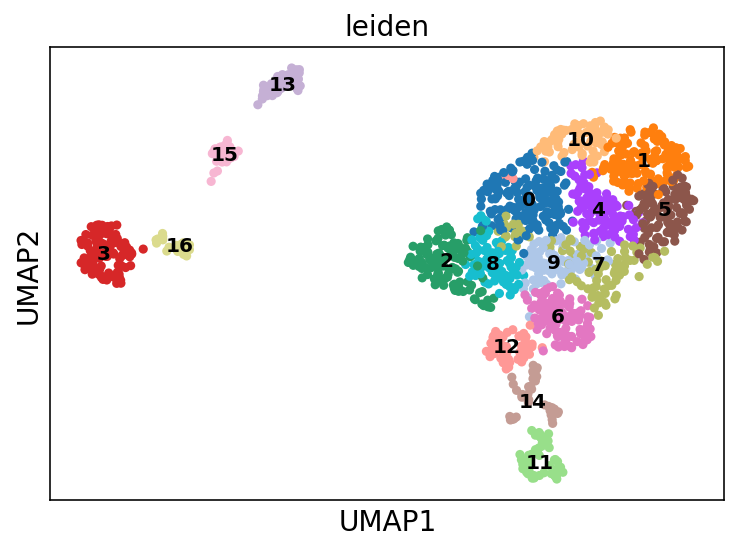

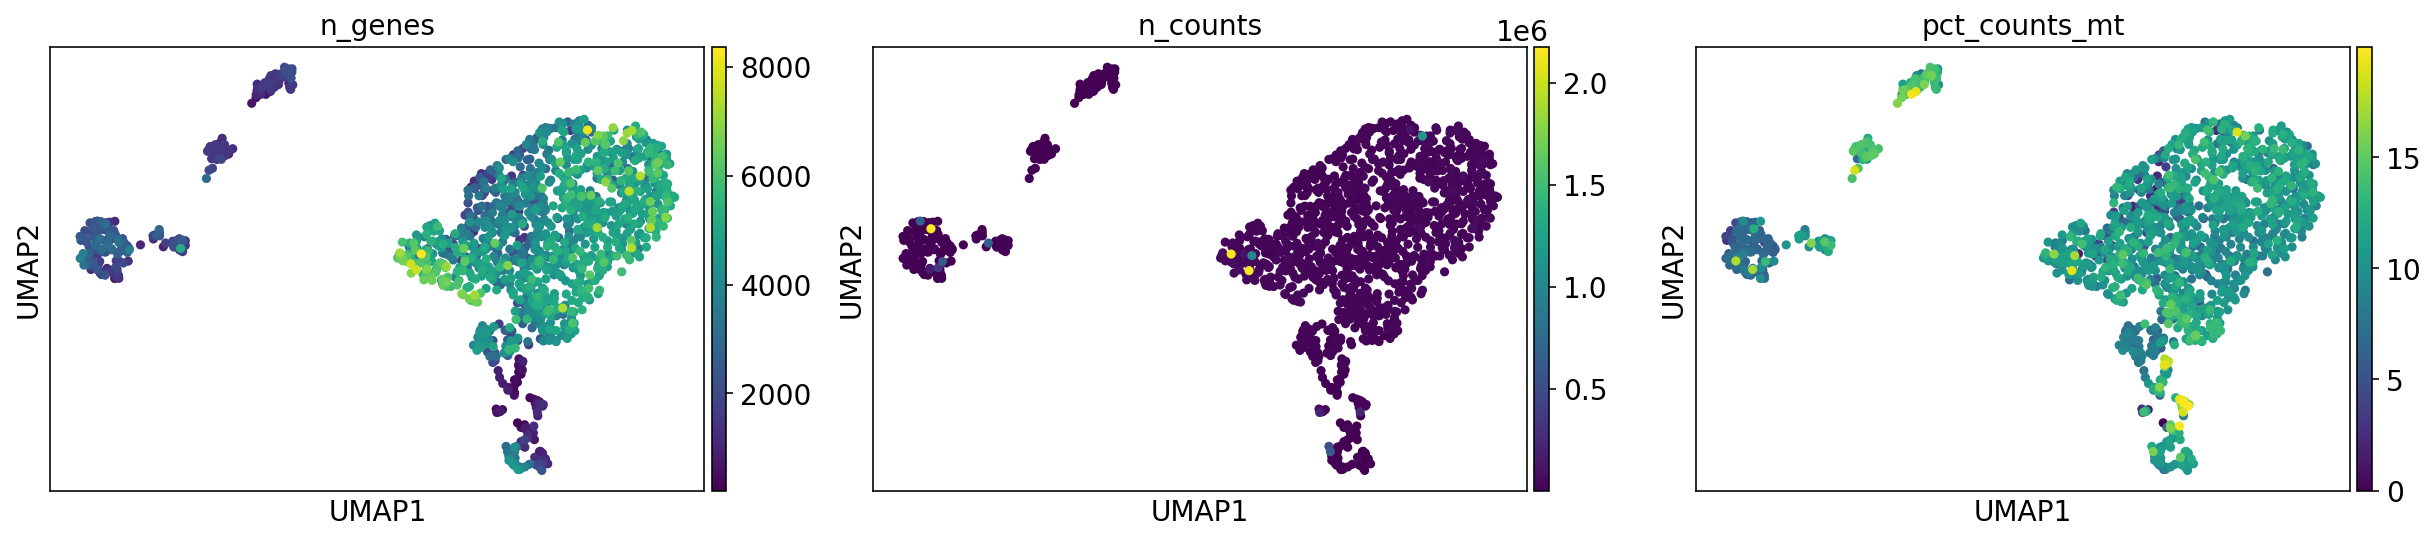

In [27]:
sc.pl.umap(organ_adata,color='leiden',legend_loc='on data')
sc.pl.umap(organ_adata,color=['n_genes','n_counts','pct_counts_mt'])


In [30]:
organ_adata.obs.columns

Index(['X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate',
       'smartseq2_sorting_direction', 'smartseq2_sort_order',
       'smartseq2_cDNA_Plate', 'cell_id', 'method', 'donor', 'X10X_replicate',
       'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes',
       'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position',
       'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class',
       'manual_annotation', 'doublet_filter', 'compartment', 'batch',
       'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation',
       'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps',
       'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet',
       'kNN', 'SVM', 'scANVI', 'compartment_pred_svm',
       'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed',
       'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed',
       'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized',
      

In [31]:
sc.tl.rank_genes_groups(organ_adata,'leiden',method='wilcoxon')

/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


In [32]:
organ_cluster_genes = pd.DataFrame(organ_adata.uns['rank_genes_groups']['names'])
organ_cluster_genes.iloc[:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,CA2,CA2,TUBA1B,GPX3,FXYD3,EZR,SLC12A2,PABPC1,RANBP1,RPL12,FABP1,PCSK1N,SPIB,SRGN,HEPACAM2,LAPTM5,CAVIN2
1,FABP1,SLC26A2,STMN1,TIMP1,CES2,LDLR,CDK6,RPL31,PRDX5,GAS5,CA2,SCGN,LYZ,CD3E,NEURL1,CXCR4,CAV1
2,C19orf33,FABP1,H2AFZ,DCN,MGST3,EDN1,RGMB,RPL13A,RPL36,RPL13,SLC26A2,CRYBA2,CA7,CXCR4,SERPINA1,TSC22D3,EGFL7
3,PHGR1,CES2,TUBB,VIM,PIGR,AREG,ETS2,RPL22,LDHB,NFKBIA,SLC26A3,SCG5,NEURL1,RGS1,MUC2,CD37,PECAM1
4,FXYD3,ATP1A1,HMGB2,C1R,SLC26A2,IER3,TFF3,IRF2BP2,STMN1,CXCL3,HSD11B2,MS4A8,HEPACAM2,CYTIP,BEST2,CD79A,CLDN5
5,LGALS4,SELENBP1,HMGN2,C1S,TXN,SFN,SOX4,ZKSCAN1,RPL39,RPL5,CA1,SCG2,CA4,CD69,ZG16,MT-RNR2,GIMAP7
6,ADH1C,FXYD3,HMGB1,TIMP2,LGALS4,PHLDA2,KLK1,RPLP0,CDCA7,GDF15,SELENBP1,MT-RNR2,MSLN,LINC-PINT,REP15,CD74,HLA-E
7,UQCR10,KRT19,TK1,LGALS1,ATP5MD,GPRC5A,EPHB3,EEF2,RPL35,RPL37,KRT19,CACNA1A,BEST4,ARHGDIB,FCGBP,CD83,CRIP2
8,CKB,HSD11B2,MAD2L1,GSN,S100A14,HERPUD1,MT-ND3,RPS17,RPL26,RPL39,TSPAN1,FEV,CEACAM5,PTPRC,CA4,CD52,LMO2
9,ATP5MD,TSPAN1,CENPW,TIMP3,UGT2B17,SQSTM1,ITGA6,GAS5,RPS18,RACK1,FXYD3,SCT,PROX1,CCL5,ITLN1,MT-RNR1,TGFBR2


In [61]:
g = list(organ_cluster_genes["11"].head(10))
g = ",".join(g)
print(g)

PCSK1N,SCGN,CRYBA2,SCG5,MS4A8,SCG2,MT-RNR2,CACNA1A,FEV,SCT


In [114]:
set(organ_adata.obs[organ_adata.obs['leiden']=='7']['manual_annotation'])

{'absorptive progenitor', 'transient amplifying cell'}

In [115]:
cluster_composition["7"]

['enterocyte: 0.01', 'intestinal transient amplifying cell: 0.99']

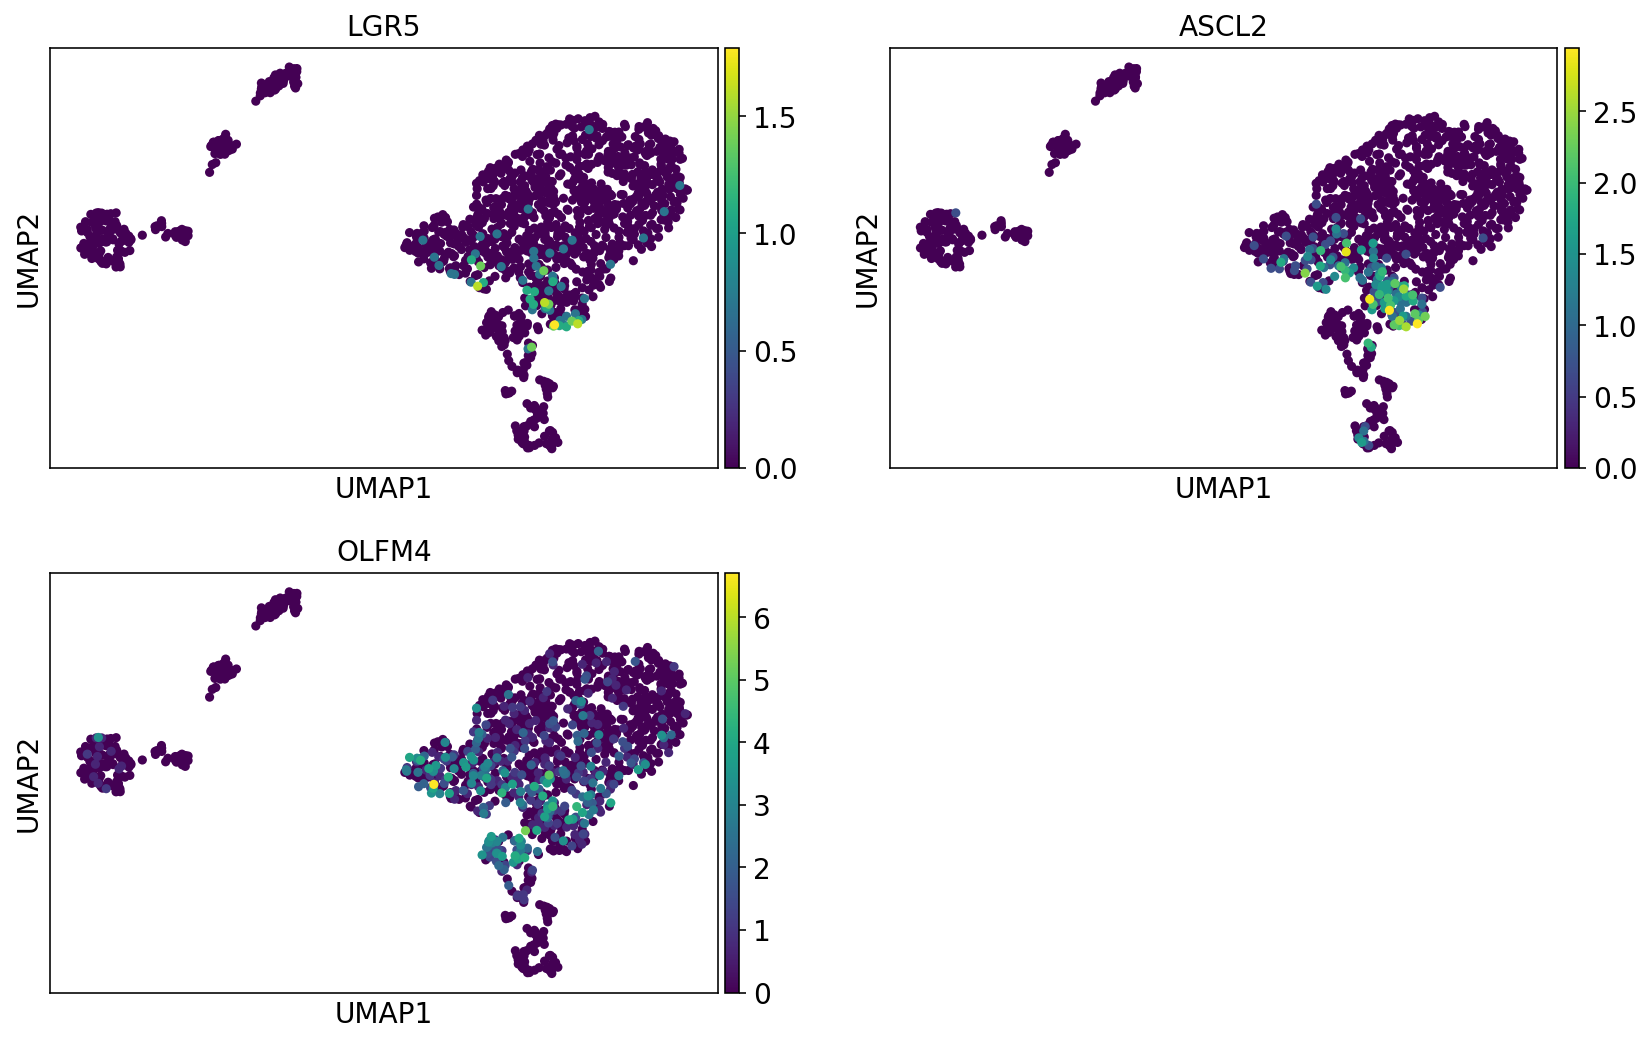

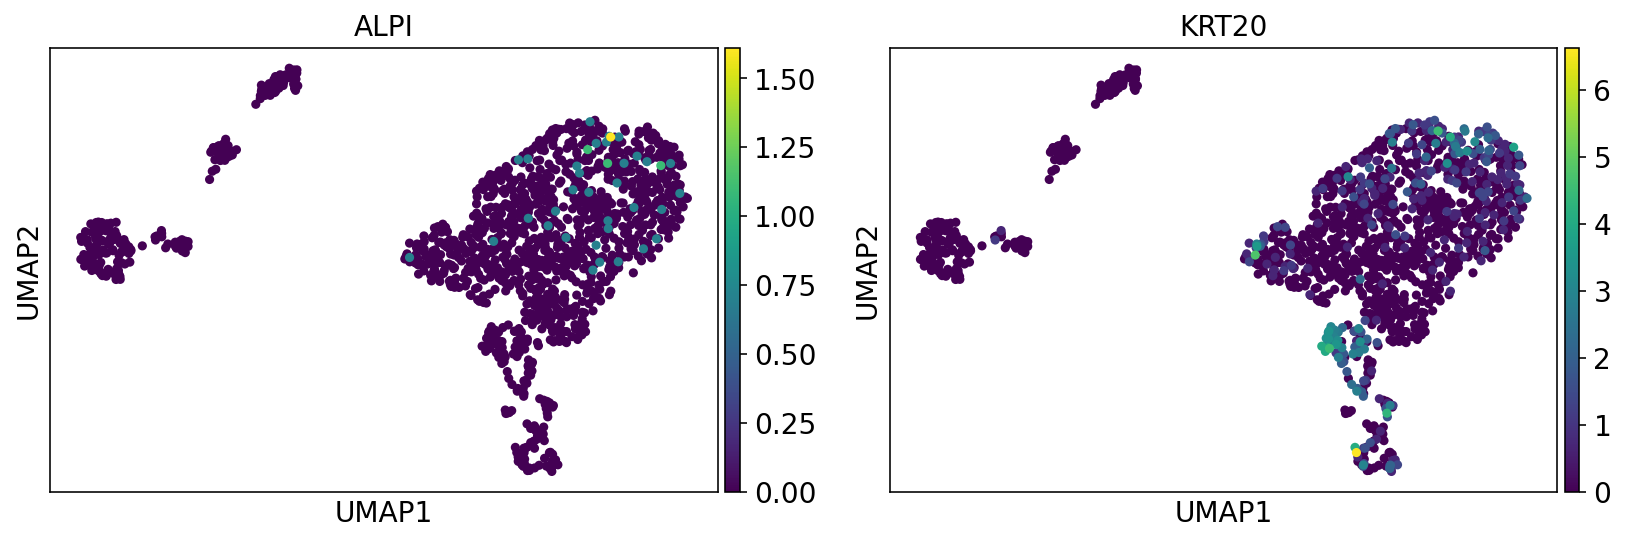

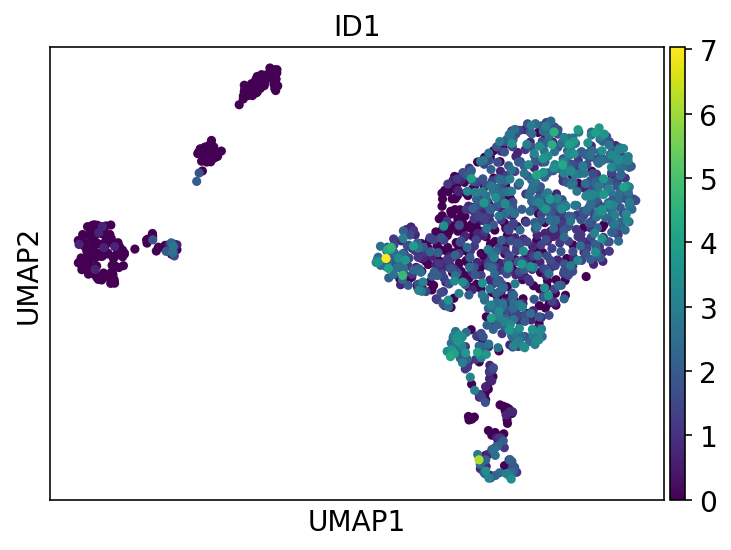

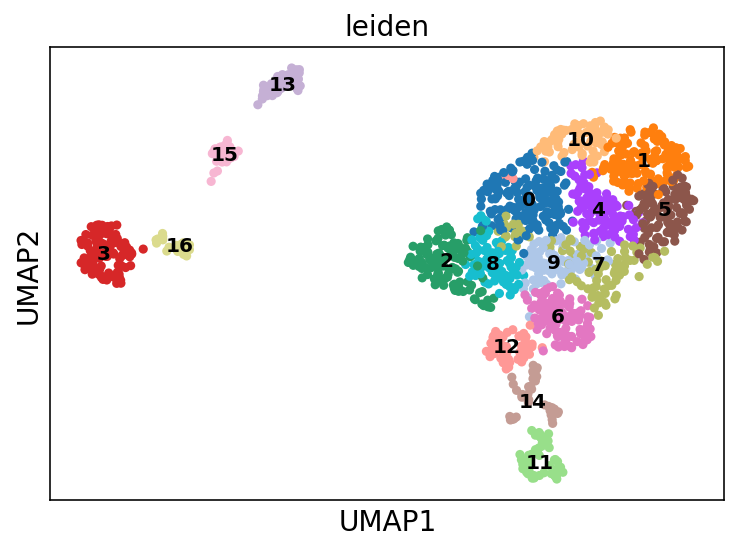

In [116]:
# sc.pl.umap(organ_adata,color=[ 'CD4','CD8A','CD3E','CD79A'],ncols=1) # t cells & b cells
sc.pl.umap(organ_adata,color=[ 'LGR5', 'ASCL2','OLFM4'],ncols=2) # Stem cells
sc.pl.umap(organ_adata,color=[ 'ALPI', 'KRT20'],ncols=2) # Enterocyte (absorptive)
# sc.pl.umap(organ_adata,color=[ 'CHGA', 'CHGB', 'CCK','TRPA1','SST','MLN'],ncols=2) # Enteroendocinre cells
# sc.pl.umap(organ_adata,color=[ 'MUC2', 'TFF3', 'ATOH1','HEPACAM2'],ncols=2) # Goblet cells
# sc.pl.umap(organ_adata,color=[ 'DCLK1','SH2D6','AVIL', 'GNG13', 'TRPM5'],ncols=2) # tuft cells
# sc.pl.umap(organ_adata,color=[ 'NR2F2','SOX17','GJA5','NOG','ITGA6'],ncols=1) # 
# sc.pl.umap(organ_adata,color=[ 'CD44','CSPG4','PDGFRB', 'ACTA2','MYL9','MYH11'],ncols=2)
# sc.pl.umap(organ_adata,color=['DCLK1','VIM','ECM1','COL1A1'])#'fibroblasts
# sc.pl.umap(organ_adata,color=['LYZ','DEFA1','FZD5','EPHB2','DLL1','WNT3','WNT11','EGF'])# paneth cells
sc.pl.umap(organ_adata,color=['ID1'])#scratch list
sc.pl.umap(organ_adata,color='leiden',legend_loc='on data')

# sc.pl.umap(organ_adata,color='anatomical_position')

In [117]:
leiden_cell_type = {
    "0": "enterocyte of epithelium of large intestine",
    "1": "enterocyte of epithelium of large intestine",
    "2": "intestinal transient amplifying cell",
    "3": "tuft cell", #DCLK1+ but mesenchymal markers GPX3+ ECM1+ MYL9+ COL1A1+
    "4": "enterocyte of epithelium of large intestine",
    "5": "enterocyte of epithelium of large intestine",
    "6" : "intestinal crypt stem cell", #LGR5 ASCL2 OLFM4
    "7": "intestinal transient amplifying cell",
    "8": "intestinal transient amplifying cell",
    "9": "intestinal transient amplifying cell",
    "10": "enterocyte of epithelium of large intestine",
    "11": "intestinal enteroendocrine cell",
    "12": 'paneth cell', # LYZ FZD5        
    "13": "T cell", # reclustering done
    "14": "goblet cell",
    "15": "B cell",
    "16": "gut endothelial cell"
}    

In [73]:
adata.var_names[adata.var_names.str.startswith("LY")]

Index(['LYPLA2', 'LYSMD1', 'LY9', 'LYPLAL1-DT', 'LYPLAL1', 'LYPLAL1-AS1',
       'LYST', 'LYST-AS1', 'LYPD9P', 'LYPD8', 'LYARP1', 'LYG2', 'LYG1',
       'LYPD1', 'LYPD6B', 'LYPD6', 'LY75-CD302', 'LY75', 'LYZL4', 'LYAR',
       'LYPLA1P2', 'LYSMD3', 'LYRM7', 'LYRM4', 'LY86-AS1', 'LY86', 'LY6G5B',
       'LY6G5C', 'LY6G6F', 'LY6G6F-LY6G6D', 'LY6G6E', 'LY6G6D', 'LY6G6C',
       'LYPLA2P1', 'LYPLA1P3', 'LYRM2', 'LYPLA1P1', 'LYPLA1', 'LYN', 'LY96',
       'LY6K', 'LYPD2', 'LYNX1-SLURP2', 'LYNX1', 'LY6D', 'LY6E-DT', 'LY6E',
       'LY6L', 'LY6H', 'LYPLA2P3', 'LYZL1', 'LYZL2', 'LYVE1', 'LYZ', 'LYSMD2',
       'LYSMD4', 'LYRM1', 'LYRM9', 'LYZL6', 'LYPLA2P2', 'LYL1', 'LYPD4',
       'LYPD3', 'LYPD5'],
      dtype='object')

# manually create mapping between cluster and cell type (this is just an example), and the relevant marker genes that was used to generate this prediction

In [118]:
organ_adata.obs["annotation_oct2020"] = organ_adata.obs["leiden"].copy()


This cell will automatically replace the leiden cluster names with cell type annotations

In [120]:
for l in leiden_cell_type.keys():
    organ_adata.obs["annotation_oct2020"].replace(l, leiden_cell_type[l], inplace=True)

# Visualize the results of the manual annotation

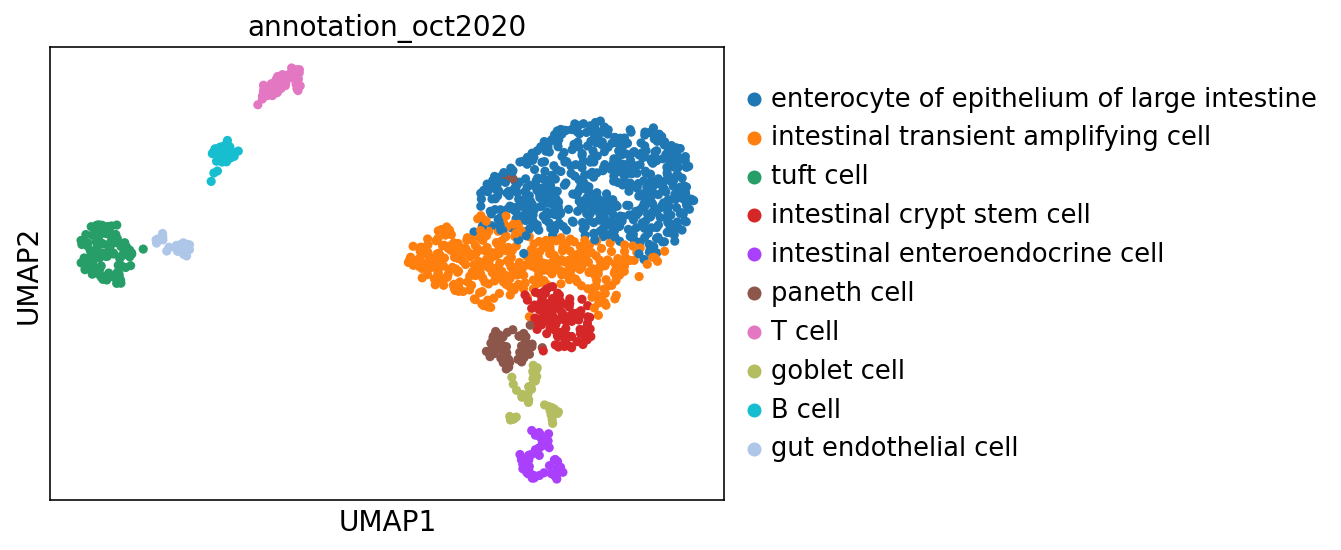

In [121]:
sc.pl.umap(
    organ_adata,
    color=["annotation_oct2020"],
    ncols=3,
)

# Subclustering

In [122]:
leiden13 = organ_adata[organ_adata.obs['leiden'].isin(["13"])].copy()
leiden13


/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


AnnData object with n_obs × n_vars = 48 × 58870
    obs: 'X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'donor', 'X10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position', 'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation', 'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps', 'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes', 'donor_method', 

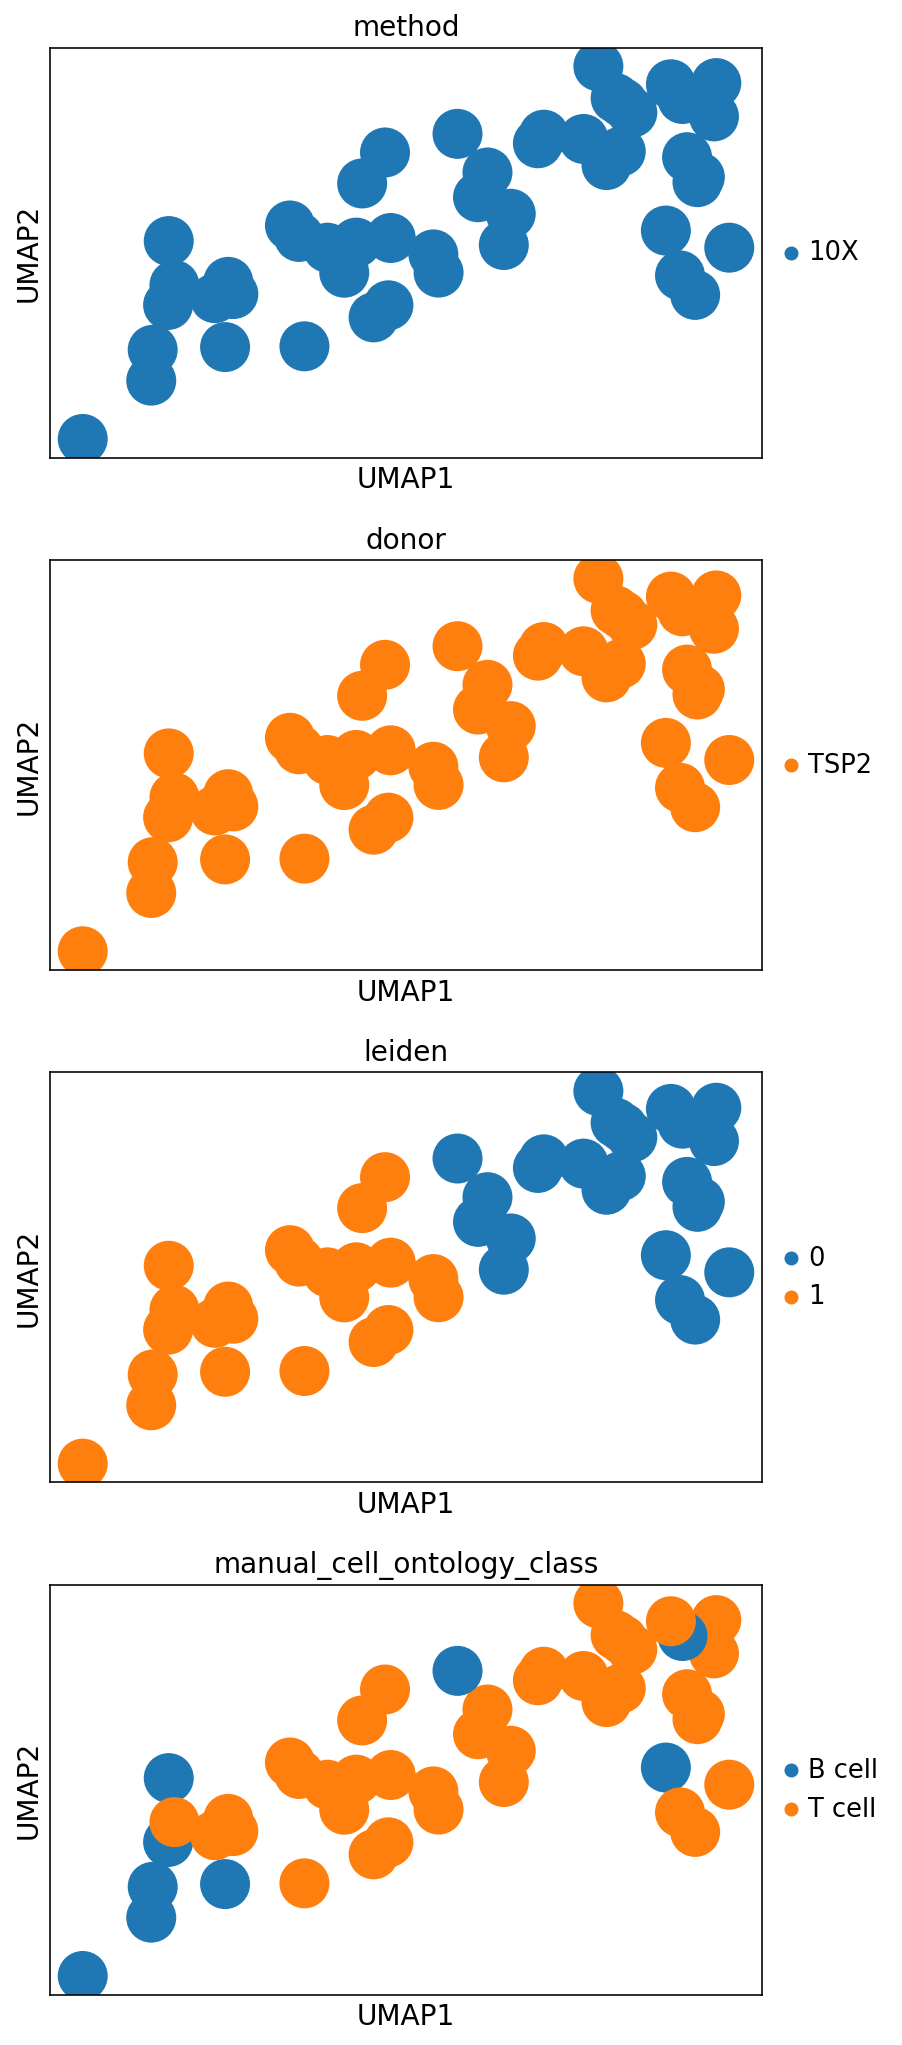

In [123]:
# sc.pp.neighbors(leiden13, use_rep="X_scvi_decontX")#, n_neighbors=10)
# sc.tl.umap(leiden13)
# leiden13.obsm["X_umap_decontX"] = leiden13.obsm["X_umap"].copy()
sc.tl.leiden(leiden13, resolution=.5)
sc.pl.umap(
    leiden13,
    color=["method", "donor", "leiden", "manual_cell_ontology_class"],
    ncols=1,
)

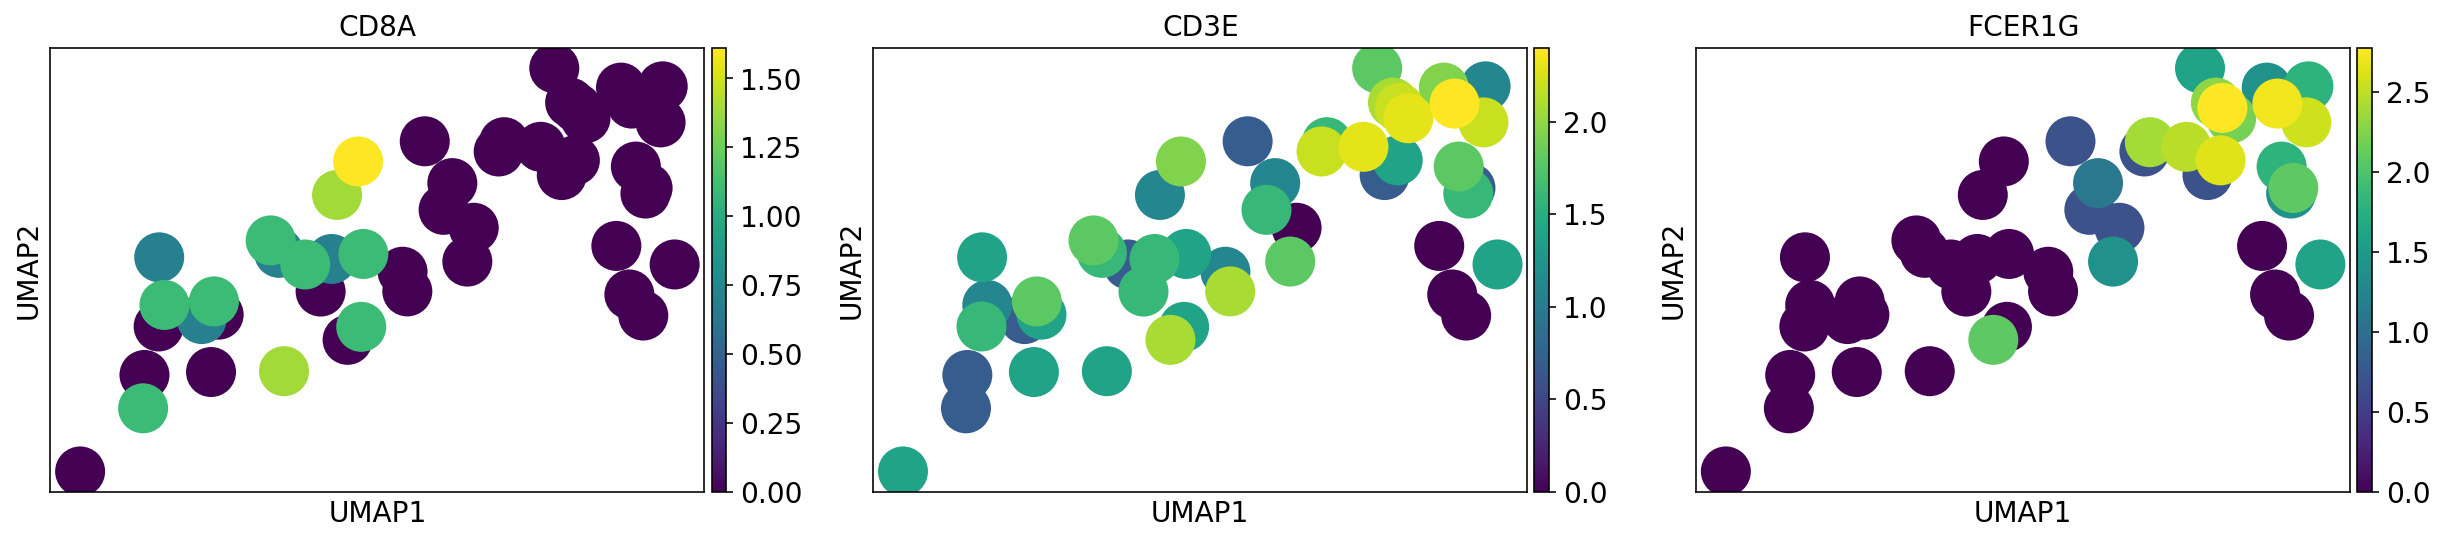

In [124]:
sc.pl.umap(leiden13,color=['CD8A','CD3E','FCER1G'])

In [128]:
organ_adata = remove_cats(organ_adata)

In [52]:
sc.tl.rank_genes_groups(leiden13,'leiden',method='wilcoxon')

In [53]:
pd.DataFrame(leiden13.uns['rank_genes_groups']['names']).iloc[:20]

,0,1
0,FCER1G,S100A4
1,GSTP1,CD3D
2,TYROBP,CD8A
3,CD247,BCL11B
4,TMIGD2,CD3G
5,CD63,CD8B
6,AREG,BATF
7,CEBPD,MGAT4A
8,IFITM2,IL7R
9,PSMB1,DNAJB1


In [129]:
c0_leiden13 = leiden13.obs[leiden13.obs["leiden"]=="0"].index
organ_adata.obs.loc[c0_leiden13,"annotation_oct2020"] = "double negative T cell"

c1_leiden13 = leiden13.obs[leiden13.obs["leiden"]=="1"].index
organ_adata.obs.loc[c1_leiden13,"annotation_oct2020"] = "CD8-positive, alpha-beta T cell"

/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'X10X_run' as categorical
... storing 'smartseq2_barcode' as categorical
... storing 'smartseq2_library_plate' as categorical
... storing 'smartseq2_sorting_direction' as categorical
... storing 'smartseq2_sort_order' as categorical
... storing 'smartseq2_cDNA_Plate' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'X10X_replicate' as categorical
... storing 'sequencer' as categorical
... storing 'sex' as categorical
... storing 'tissue' as categorical
... storing 'smartseq2_well_seq' as categorical
... storing 'notes' as categorical
... storing 'smartseq2_sorted_population' as categorical
... storing 'X10X_sample' as categorical
... storing 'anatomical_position' as cate

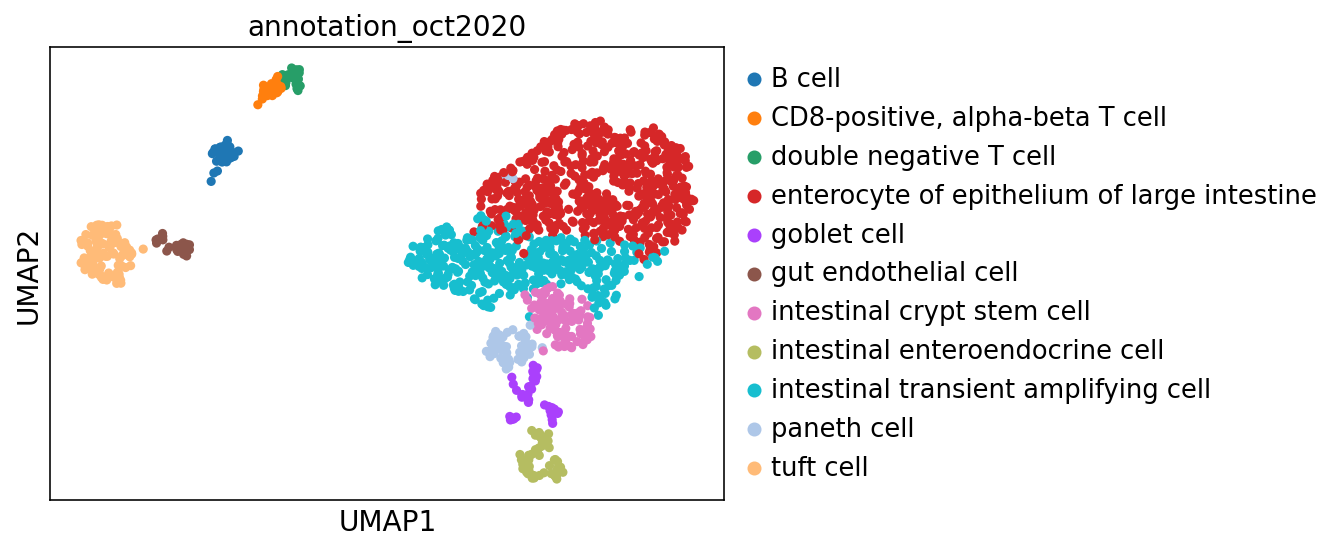

In [130]:
sc.pl.umap(
    organ_adata,
    color=["annotation_oct2020"],
    ncols=3,
)

# manually create mapping between cell type and compartment (this is just an example)

In [133]:
set(organ_adata.obs['annotation_oct2020'])

{'B cell',
 'CD8-positive, alpha-beta T cell',
 'double negative T cell',
 'enterocyte of epithelium of large intestine',
 'goblet cell',
 'gut endothelial cell',
 'intestinal crypt stem cell',
 'intestinal enteroendocrine cell',
 'intestinal transient amplifying cell',
 'paneth cell',
 'tuft cell'}

In [135]:
# options are Immune, Stromal, Epithelial, Endothelial
compartment_mapping = {
    'B cell': "Immune",
    'CD8-positive, alpha-beta T cell': "Immune",
    'double negative T cell': "Immune",
    'enterocyte of epithelium of large intestine': "Epithelial",
    'goblet cell': "Epithelial",
    'gut endothelial cell' : "Endothelial",
    'intestinal crypt stem cell': "Epithelial",
    'intestinal enteroendocrine cell': "Epithelial",
    'intestinal transient amplifying cell': "Epithelial",
    'paneth cell': "Epithelial",
    'tuft cell': "Epithelial"
}

In [136]:
organ_adata.obs["compartment_oct2020"] = organ_adata.obs["annotation_oct2020"].copy()

This cell will automatically replace the leiden cluster names with cell type annotations

In [137]:
for c in compartment_mapping.keys():
    organ_adata.obs["compartment_oct2020"].replace(
        c, compartment_mapping[c], inplace=True
    )

# Visualize the results of the new compartment splitting

/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


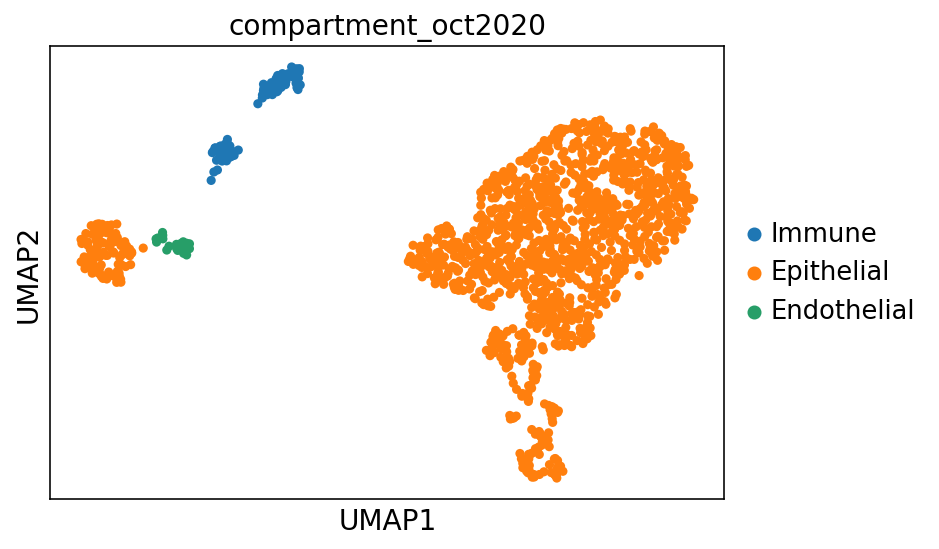

In [138]:
sc.pl.umap(
    organ_adata,
    color=["compartment_oct2020"],
    ncols=3,
)

# visualize compartment markers

In [141]:
compartment_markers = {
    "Epithelial": ["CDH1", "CLDN4", "EPCAM"],
    "Endothelial": ["CA4", "CDH5", "CLDN5", "PECAM1", "VWF"],
    "Stromal": ["BGN", "DCN", "COL1A2"],
    "Immune": ["LCP1", "PTPRC", "RAC2"],
}

In [142]:
for x in compartment_markers.keys():
    sc.tl.score_genes(organ_adata, compartment_markers[x], score_name="%s_score" % x)

/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



/home/angela/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



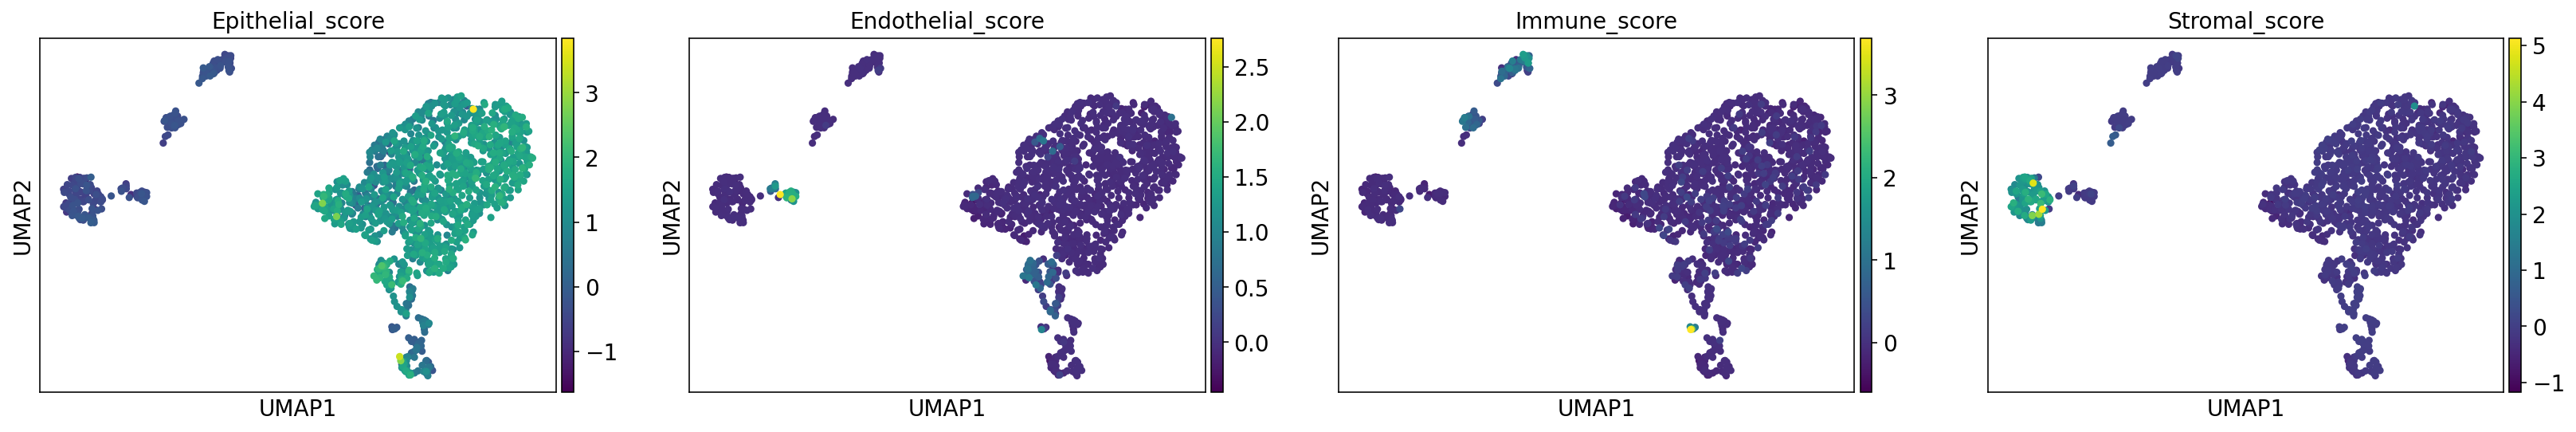

In [143]:
sc.pl.umap(
    organ_adata,
    color=["Epithelial_score", "Endothelial_score", "Immune_score", "Stromal_score"],
)

# read in cell ontology 

In [27]:
import obonet

ont_dir = "/data/yosef2/users/chenling/TabulaSapiensData/ontology/"
obo = ont_dir + "cl.obo.txt"
f = open(obo, "r")
co = obonet.read_obo(f)
f.close()

celltype_dict = {}
for x in co.nodes:
    celltype_dict[co.nodes[x]['name']] = x



You can look up all T cell by typing celltype_dict['T'] and using tab complete  

In [28]:
celltype_dict['T cell']

'CL:0000084'

You can also look at the names of all subsets of T cell that contains 'CD4' in their names

In [29]:
import networkx as nx


def PrintChildren(co, parent, pattern=""):
    all_children = [x for x in nx.ancestors(co, celltype_dict[parent])]
    return [co.nodes[x]["name"] for x in all_children if pattern in co.nodes[x]["name"]]


PrintChildren(co, "T cell", "CD4")

['CD4-negative CD8-negative gamma-delta intraepithelial T cell',
 'CD4-negative, CD8-negative type I NK T cell secreting interferon-gamma',
 'CD69-positive, CD4-positive single-positive thymocyte',
 'effector memory CD4-positive, alpha-beta T cell',
 'CD4-positive, alpha-beta memory T cell',
 'effector CD4-positive, alpha-beta T cell',
 'CD24-positive, CD4 single-positive thymocyte',
 'CD4-positive type I NK T cell secreting interferon-gamma',
 'CD4-positive type I NK T cell secreting interleukin-4',
 'CD4-positive, alpha-beta T cell',
 'CD4-positive type I NK T cell',
 'CD4-negative, CD8-negative type I NK T cell',
 'CD2-positive, CD5-positive, CD44-positive alpha-beta intraepithelial T cell',
 'activated CD4-positive, CD25-positive, CCR4-positive, alpha-beta regulatory T cell, human',
 'CD4-negative, CD8-negative type I NK T cell secreting interleukin-4',
 'CD4-positive, alpha-beta intraepithelial T cell',
 'mature CD4 single-positive thymocyte',
 'CD4-positive, CXCR3-negative, CCR6-

# save data

In [144]:
data_path

'/mnt/ibm_lg/angela/sapiens/data/'

In [146]:
organ_adata.write_h5ad(
    data_path + "decontX/Pilot1_Pilot2.decontX.%s.h5ad" % organ
)